In [1]:
# Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data collection
dataset = pd.read_csv("data/board_games.csv")

In [3]:
# Top rows of the dataset 
dataset.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [4]:
# Data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [5]:
# Identifying null values
dataset.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

In [6]:
# Handling columns with null values
dataset = dataset.drop(['compilation', 'expansion', 'family', 'artist', 'mechanic', 'thumbnail', 'playing_time'], axis = 1)

In [7]:
# Combining the values of the columns 'designer' and 'publisher' into 'designer' column and reverse
dataset['designer'].fillna(dataset['publisher'], inplace=True)
dataset['publisher'].fillna(dataset['designer'], inplace=True)

In [8]:
# Create a new column 'average_playtime'
dataset['average_playtime'] = (dataset['min_playtime'] + dataset['max_playtime']) / 2

In [9]:
# Deleting 'max_playtime' and 'min_playtime' column
dataset = dataset.drop(['max_playtime', 'min_playtime'], axis = 1)

In [10]:
# Replace null values in 'image' with 'image_not_found'
dataset['image'].fillna('image_not_found', inplace=True)

# Replace null values in 'category' with 'Other'
dataset['category'].fillna('Other', inplace=True)

In [11]:
dataset.isnull().sum()

game_id             0
description         0
image               0
max_players         0
min_age             0
min_players         0
name                0
year_published      0
category            0
designer            1
publisher           1
average_rating      0
users_rated         0
average_playtime    0
dtype: int64

In [12]:
dataset.head()

,game_id,description,image,max_players,min_age,min_players,name,year_published,category,designer,publisher,average_rating,users_rated,average_playtime
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,14,3,Die Macher,1986,"Economic,Negotiation,Political",Karl-Heinz Schmiel,"Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498,240.0
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,12,3,Dragonmaster,1981,"Card Game,Fantasy","G. W. ""Jerry"" D'Arcey","E.S. Lowe,Milton Bradley",6.60815,478,30.0
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,10,2,Samurai,1998,"Abstract Strategy,Medieval",Reiner Knizia,"999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019,45.0
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,12,2,Tal der Könige,1992,Ancient,Christian Beierer,KOSMOS,6.60675,314,60.0
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,12,3,Acquire,1964,Economic,Sid Sackson,"3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195,90.0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           10532 non-null  int64  
 1   description       10532 non-null  object 
 2   image             10532 non-null  object 
 3   max_players       10532 non-null  int64  
 4   min_age           10532 non-null  int64  
 5   min_players       10532 non-null  int64  
 6   name              10532 non-null  object 
 7   year_published    10532 non-null  int64  
 8   category          10532 non-null  object 
 9   designer          10531 non-null  object 
 10  publisher         10531 non-null  object 
 11  average_rating    10532 non-null  float64
 12  users_rated       10532 non-null  int64  
 13  average_playtime  10532 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [14]:
# Discretize the 'average_rating' column
dataset['average_rating_discretized'] = pd.cut(dataset['average_rating'], bins=3, labels=['Low', 'Medium', 'High'])

# Discretize the 'average_rating' column
dataset['users_rated_discretized'] = pd.cut(dataset['users_rated'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Show the discretized columns
dataset[['average_rating', 'average_rating_discretized','users_rated', 'users_rated_discretized']]

,average_rating,average_rating_discretized,users_rated,users_rated_discretized
0,7.66508,High,4498,Very Low
1,6.60815,High,478,Very Low
2,7.44119,High,12019,Very Low
3,6.60675,High,314,Very Low
4,7.35830,High,15195,Low
...,...,...,...,...
10527,8.35333,High,75,Very Low
10528,8.08780,High,82,Very Low
10529,7.28016,High,63,Very Low
10530,7.45871,High,341,Very Low


In [15]:
# Find the percentage of total ratings achieved by each game with their respective number of minimum players

# Define a function
def calculate_percentage(x):
   return x * 100 / x.sum()

# Apply the function to column
dataset['percent_of_rating'] = dataset.groupby('min_players')['average_rating'].transform(calculate_percentage)

# Show the results
dataset[['name', 'min_players', 'average_rating', 'percent_of_rating']]

,name,min_players,average_rating,percent_of_rating
0,Die Macher,3,7.66508,0.087250
1,Dragonmaster,3,6.60815,0.075219
2,Samurai,2,7.44119,0.015607
3,Tal der Könige,2,6.60675,0.013857
4,Acquire,3,7.35830,0.083758
...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",1,8.35333,0.096678
10528,Codex: Card-Time Strategy – Core Set,2,8.08780,0.016963
10529,Wind the Film!,2,7.28016,0.015269
10530,Robo Rally (2016),2,7.45871,0.015643


In [16]:
# Binarize the 'average_playtime' column

# For each game check the recommended minimum age that is required.
# If the age is less than 18 it is mapping to 1, otherwise to 0.
dataset['recommended_under_18'] = dataset['min_age'].apply(lambda x: 1 if x < 18 else 0)

# Show the results
dataset[['min_age', 'recommended_under_18']]

,min_age,recommended_under_18
0,14,1
1,12,1
2,10,1
3,12,1
4,12,1
...,...,...
10527,12,1
10528,13,1
10529,12,1
10530,12,1


In [17]:
dataset.head()

,game_id,description,image,max_players,min_age,min_players,name,year_published,category,designer,publisher,average_rating,users_rated,average_playtime,average_rating_discretized,users_rated_discretized,percent_of_rating,recommended_under_18
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,14,3,Die Macher,1986,"Economic,Negotiation,Political",Karl-Heinz Schmiel,"Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498,240.0,High,Very Low,0.087250,1
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,12,3,Dragonmaster,1981,"Card Game,Fantasy","G. W. ""Jerry"" D'Arcey","E.S. Lowe,Milton Bradley",6.60815,478,30.0,High,Very Low,0.075219,1
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,10,2,Samurai,1998,"Abstract Strategy,Medieval",Reiner Knizia,"999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019,45.0,High,Very Low,0.015607,1
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,12,2,Tal der Könige,1992,Ancient,Christian Beierer,KOSMOS,6.60675,314,60.0,High,Very Low,0.013857,1
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,12,3,Acquire,1964,Economic,Sid Sackson,"3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195,90.0,High,Low,0.083758,1


In [18]:
# Selecting features for outlier detection
outlier_features = dataset[['min_age', 'min_players', 'max_players', 'average_rating', 'average_playtime']]

# Standardize the data using Z-Score
scaler = StandardScaler()
standardized_features = scaler.fit_transform(outlier_features)

# Z-Score Outlier Detection
z_scores = pd.DataFrame(standardized_features, columns=outlier_features.columns)
outliers_zscore = z_scores[(z_scores.abs() > 3).any(axis=1)]

# Display the results
print("Z-Score Outliers:")
print(outliers_zscore)

Z-Score Outliers:
        min_age  min_players  max_players  average_rating  average_playtime
206    1.241657    -0.106187     0.071103        1.369683         13.824876
231    0.662125    -0.106187     0.018147        0.427254          3.712769
490    0.662125    -3.116594    -0.299591        0.222250         -0.133554
508    0.662125    -0.106187     4.996036       -0.538755         -0.040498
677    2.400721    -3.116594    -0.299591       -0.232330         -0.040498
...         ...          ...          ...             ...               ...
10161 -0.496938    -0.106187    52.603719       -0.276808         -0.048253
10194 -0.496938    -0.106187     4.943079        0.000240         -0.102536
10421  0.662125     2.904219     4.943079        0.966543         -0.063762
10448 -0.496938    -0.106187     4.943079        0.971106         -0.133554
10452 -0.496938     1.399016    -0.034810       -3.221769         -0.087026

[230 rows x 5 columns]


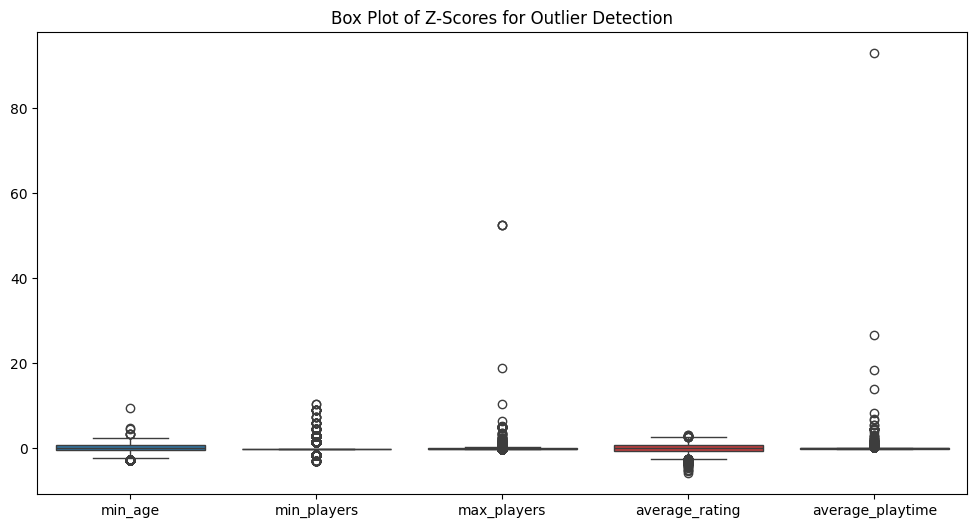

In [19]:
# Box plot for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=z_scores)
plt.title("Box Plot of Z-Scores for Outlier Detection")
plt.show()

In [20]:
# Find rows where 'average_playtime' is 0
zero_average_playtime_rows = dataset[dataset['average_playtime'] == 0]

# Display the rows with 'average_playtime' equal to 0
zero_average_playtime_rows

,game_id,description,image,max_players,min_age,min_players,name,year_published,category,designer,publisher,average_rating,users_rated,average_playtime,average_rating_discretized,users_rated_discretized,percent_of_rating,recommended_under_18
49,55,"Loosely based on the book by Jostein Gaarder, ...",//cf.geekdo-images.com/images/pic575231.jpg,6,12,2,Sophie's World,1998,Trivia,"Ken Howard,Robert Hyde","KOSMOS,Orion,Pontaccio,Sophisticated Games",4.93768,69,0.0,Medium,Very Low,0.010356,1
228,280,Neue Spiele im Alten Rom (or New Games in Old...,//cf.geekdo-images.com/images/pic5886.jpg,7,10,2,Neue Spiele im alten Rom,1994,"Abstract Strategy,Game System",Reiner Knizia,"New Games Order, LLC,Piatnik",6.81040,173,0.0,High,Very Low,0.014284,1
229,281,from the translation:&#10;The Swedish East Ind...,//cf.geekdo-images.com/images/pic1851288.jpg,5,10,2,Ostindiska Kompaniet,1991,"Economic,Nautical",Dan Glimne,G&RRR,4.75000,130,0.0,Medium,Very Low,0.009962,1
397,489,King Maya Pacal was born on March 26th 603 a.c...,//cf.geekdo-images.com/images/pic979203.jpg,2,12,2,Pacal,1999,Card Game,Günter Burkhardt,Klee,6.19779,86,0.0,Medium,Very Low,0.012999,1
437,549,Excerpted from a review by Ken Tidwell&#10;&#1...,//cf.geekdo-images.com/images/pic139628.jpg,12,12,2,Aerodrome,1994,"Aviation / Flight,Miniatures,Wargame,World War I","Stanley Kubiak,Winston J. Kubiak",(Self-Published),7.63393,84,0.0,High,Very Low,0.016011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10403,201406,From the Kickstarter blurb:&#10;&#10;The objec...,//cf.geekdo-images.com/images/pic3487555.png,5,0,2,OrganATTACK!,2016,Other,Nick Seluk,(Self-Published),6.65429,70,0.0,High,Very Low,0.013956,1
10429,203716,Description from the publisher:&#10;&#10;This ...,//cf.geekdo-images.com/images/pic3090966.jpg,6,0,2,Ta-Da!,2016,Other,Stephen Avery,CMON Limited,6.35795,88,0.0,Medium,Very Low,0.013335,1
10439,204543,Description from the publisher:&#10;&#10;Get r...,//cf.geekdo-images.com/images/pic3280969.jpg,5,16,4,Speak Out,2016,"Card Game,Party Game",Hasbro,Hasbro,5.29277,83,0.0,Medium,Very Low,0.370019,1
10448,204734,You don't want to be stuck with sticks in Stic...,//cf.geekdo-images.com/images/pic3107661.jpg,99,8,2,Stick Stack,2016,Action / Dexterity,"Forrest-Pruzan Creative,Brad Ross,Jim Winslow","Broadway Toys LTD,Mandoo Games,Wonder Forge",7.19661,59,0.0,High,Very Low,0.015094,1


In [21]:
# Filter rows where 'average_playtime' is 0 and drop them
dataset = dataset[dataset['average_playtime'] != 0]

In [22]:
# Find rows where both 'min_players' and 'max_players' are 0
zero_players_rows = dataset[(dataset['min_players'] == 0) & (dataset['max_players'] == 0)]

# Display the rows with min_players and max_players equal to 0
zero_players_rows

,game_id,description,image,max_players,min_age,min_players,name,year_published,category,designer,publisher,average_rating,users_rated,average_playtime,average_rating_discretized,users_rated_discretized,percent_of_rating,recommended_under_18
677,920,Ultimate Ouburst is a superset of the original...,//cf.geekdo-images.com/images/pic243836.jpg,0,18,0,Ultimate Outburst,1999,Party Game,Brian Hersch,"Hasbro,Hersch and Company,Parker Brothers",6.17330,221,60.0,Medium,Very Low,3.023134,0
1074,1618,(from the back of the box:)&#10;&#10;The Frenc...,//cf.geekdo-images.com/images/pic33540.jpg,0,0,0,French Foreign Legion,1982,Wargame,"Larry V. Brom,Vernon Jay Stribling,E. R. Teuber",Yaquinto,7.23214,56,60.0,High,Very Low,3.541659,1
1472,2356,"Players in turn roll the 21 word cubes, set th...",//cf.geekdo-images.com/images/pic275151.jpg,0,10,0,Scrabble Sentence Cube Game,1971,"Dice,Word Game",(Uncredited),"danspil,Selchow & Righter,Top-Toy",4.62586,116,10.0,Medium,Very Low,2.265335,1
1709,2860,Piecepack is to board games what a Standard De...,//cf.geekdo-images.com/images/pic119215.jpg,0,5,0,Piecepack,2001,Game System,James Kyle,"Blue Panther,IcePack Games,Mesomorph Games,Pie...",7.09139,138,10.0,High,Very Low,3.472732,1
1835,3127,The Age of Empires Expandable Card Game is a C...,//cf.geekdo-images.com/images/pic327321.jpg,0,12,0,Age of Empires II,2000,"Card Game,Collectible Components,Fighting,Medi...","Marcus D'Amelio,David May,Ted Triebull",Journeyman Press,5.88348,115,120.0,Medium,Very Low,2.881205,1
2295,4289,(from the game box:)&#10;&#10;88 is an intense...,//cf.geekdo-images.com/images/pic412210.jpg,0,12,0,88,1980,"Wargame,World War II",James M. Day,Yaquinto,7.29423,104,60.0,High,Very Low,3.572065,1
2297,4292,&quot;Being a set of introductory rules for th...,//cf.geekdo-images.com/images/pic31648.jpg,0,12,0,The Sword and the Flame,1979,"Miniatures,Wargame",Larry V. Brom,"And That's The Way It Was...,Greenfield Hobby ...",7.42582,91,60.0,High,Very Low,3.636506,1
2917,6540,Fear God &amp; Dread Nought completes the Admi...,//cf.geekdo-images.com/images/pic37116.jpg,0,12,0,Fear God and Dread Nought,2001,"Miniatures,Nautical,Wargame,World War I","Larry Bond,Chris Carlson,Michael Harris,Ed Ket...",Clash of Arms Games,7.32759,87,360.0,High,Very Low,3.588402,1
3512,9211,"Push a button, slide the lever, or turn a knob...",//cf.geekdo-images.com/images/pic306859.jpg,0,5,0,Screwball Scramble,1979,"Action / Dexterity,Racing",(Uncredited),"Maplegrove,Pavilion,Tomy",5.48418,231,20.0,Medium,Very Low,2.685664,1
4413,18776,This is the third and final volume in Robert B...,//cf.geekdo-images.com/images/pic84883.jpg,0,12,0,The Mediterranean,2005,"Wargame,World War II",Rob Beyma,Clash of Arms Games,6.97059,51,480.0,High,Very Low,3.413575,1


In [23]:
# Drop the rows with min_players and max_players equal to 0
dataset.drop(zero_players_rows.index, inplace=True)

In [24]:
# Set 'min_players' to 1 where 'min_players' is 0
dataset.loc[dataset['min_players'] == 0, 'min_players'] = 1

In [25]:
# Find rows where 'min_age' is 0
zero_min_age_rows = dataset[dataset['min_age'] == 0]

# Display the rows with 'min_age' equal to 0
print("Rows with 'min_age' equal to 0:")
zero_min_age_rows

Rows with 'min_age' equal to 0:


,game_id,description,image,max_players,min_age,min_players,name,year_published,category,designer,publisher,average_rating,users_rated,average_playtime,average_rating_discretized,users_rated_discretized,percent_of_rating,recommended_under_18
139,166,"In this cheerfully demented offering, particip...",//cf.geekdo-images.com/images/pic180585.jpg,6,0,2,Black Death,1993,"Educational,Medical",Greg Porter,"BTRC (Blacksburg Tactical Research Center),Dev...",5.70588,119,120.0,Medium,Very Low,0.011967,1
236,288,Rossyia 1917 is mid-high complexity game of th...,//cf.geekdo-images.com/images/pic49238.jpg,5,0,2,Rossyïa 1917,1995,"Civil War,Wargame",François-Stanislas Thomas,Azure Wish Enterprise (AWE),7.25508,63,300.0,High,Very Low,0.015216,1
450,563,The game of the great American lawsuit. &#10;I...,//cf.geekdo-images.com/images/pic3923.jpg,15,0,4,Doolittle & Waite,1986,"Bluffing,Card Game,Negotiation",(Uncredited),Inward Games,6.21793,87,90.0,Medium,Very Low,0.434698,1
517,669,A light card game involving the build-up and d...,//cf.geekdo-images.com/images/pic5254.jpg,6,0,2,Plague & Pestilence,1993,"Card Game,Medieval","Tray Green,Dawn Payn","Chessex,Hillary's Toy Box",6.12509,627,30.0,Medium,Very Low,0.012846,1
534,695,This abstract strategy doesn't really use the ...,//cf.geekdo-images.com/images/pic1007.jpg,2,0,2,Fibonacci,1992,Abstract Strategy,Thomas Naylor,Thomas Naylor and Associates,6.33246,57,30.0,Medium,Very Low,0.013281,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10346,198003,Dark Deeds is a darkly humorous card game of s...,//cf.geekdo-images.com/images/pic2984586.jpg,5,0,2,Dark Deeds,2016,Card Game,"Andy Chambers,Ryan Miller",Games & Gears LLP,7.99865,74,30.0,High,Very Low,0.016776,1
10365,198855,GearSeed is a peculiar world of shifting seaso...,//cf.geekdo-images.com/images/pic3007638.jpg,4,0,2,GearSeed,2016,"Card Game,Fantasy",John Clowdus,Small Box Games,5.90448,52,22.5,Medium,Very Low,0.012384,1
10417,203102,"In Buffy the Vampire Slayer: The Board Game, y...",//cf.geekdo-images.com/images/pic3080265.png,6,0,1,Buffy the Vampire Slayer: The Board Game,2016,Movies / TV / Radio theme,"Josh Derksen,Thomas M. Gofton,Dan Hoang,Aron M...",Jasco Games,7.31916,214,50.0,High,Very Low,0.084709,1
10419,203270,From the publisher:&#10;&#10;Are you ready to ...,//cf.geekdo-images.com/images/pic3218656.jpg,4,0,2,Gorechosen,2016,"Dice,Fantasy,Fighting,Miniatures",James M. Hewitt,Games Workshop Ltd.,7.39058,156,50.0,High,Very Low,0.015501,1


In [26]:
# Remove rows where 'min_age' is 0
dataset = dataset[dataset['min_age'] != 0]

# Filter rows where 'max_players' is 0 and drop them
dataset = dataset[dataset['max_players'] != 0]

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9700 entries, 0 to 10531
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   game_id                     9700 non-null   int64   
 1   description                 9700 non-null   object  
 2   image                       9700 non-null   object  
 3   max_players                 9700 non-null   int64   
 4   min_age                     9700 non-null   int64   
 5   min_players                 9700 non-null   int64   
 6   name                        9700 non-null   object  
 7   year_published              9700 non-null   int64   
 8   category                    9700 non-null   object  
 9   designer                    9700 non-null   object  
 10  publisher                   9700 non-null   object  
 11  average_rating              9700 non-null   float64 
 12  users_rated                 9700 non-null   int64   
 13  average_playtime      

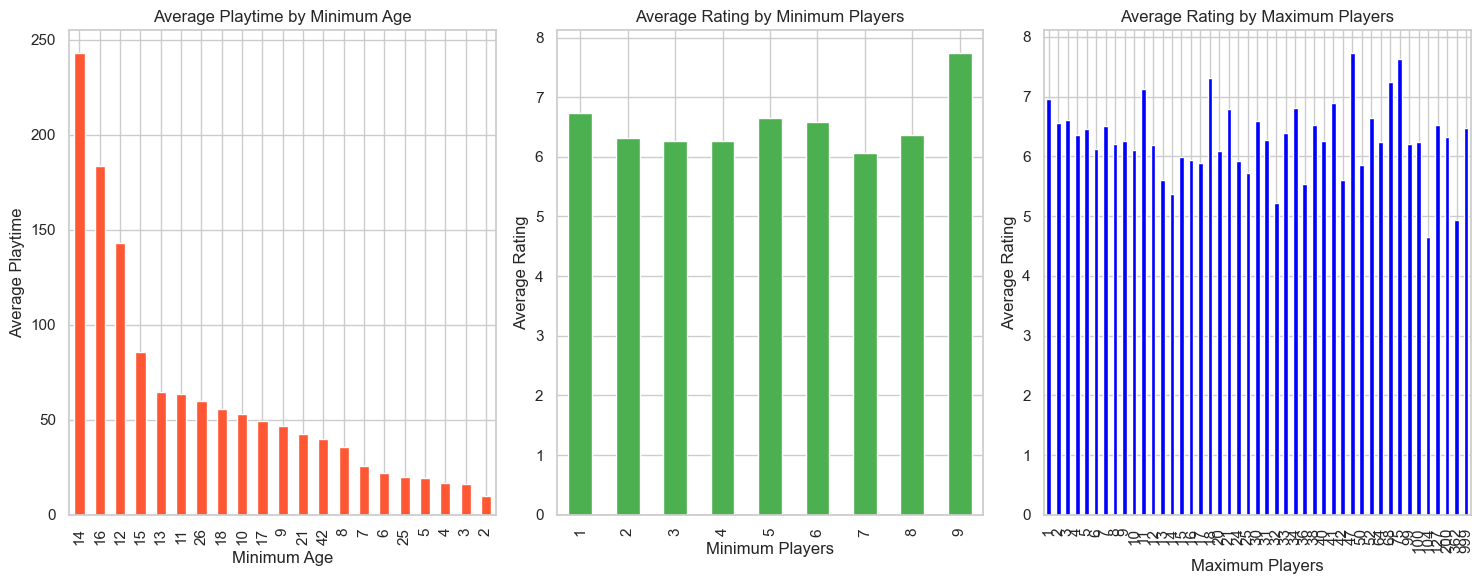

In [28]:
# Setting visualization style
sns.set(style="whitegrid")

# Distribution of average playtime across different age
min_age_analysis = dataset.groupby('min_age')['average_playtime'].mean().sort_values(ascending=False)

# Comparison of average rating among different player counts (min_players)
min_players_count_analysis = dataset.groupby('min_players')['average_rating'].mean()

# Comparison of average rating among different player counts (max_players)
max_players_count_analysis = dataset.groupby('max_players')['average_rating'].mean()

# Plotting the results
plt.figure(figsize=(15, 6))

# Plot for age analysis
plt.subplot(1, 3, 1)
min_age_analysis.plot(kind='bar', color='#FF5733')
plt.title('Average Playtime by Minimum Age')
plt.xlabel('Minimum Age')
plt.ylabel('Average Playtime')
plt.xticks(rotation=90)

# Plot for min players count analysis
plt.subplot(1, 3, 2)
min_players_count_analysis.plot(kind='bar', color='#4CAF50')
plt.title('Average Rating by Minimum Players')
plt.xlabel('Minimum Players')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)

# Plot for max players count analysis
plt.subplot(1, 3, 3)
max_players_count_analysis.plot(kind='bar', color='blue')
plt.title('Average Rating by Maximum Players')
plt.xlabel('Maximum Players')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)

# Adjusting the layout
plt.tight_layout()

plt.show()

In [29]:
# Dictionary to store summary statistics for numerical columns
numerical_summary_statistics = {}

# Numerical columns
numerical_columns = ['min_players', 'max_players', 'min_age', 'year_published', 'average_rating', 'average_playtime']

# Numerical Columns Summary Statistics
for column in numerical_columns:
    numerical_summary_statistics[column] = {
        'Mean': dataset[column].mean(),
        'Median': dataset[column].median(),
        'Mode': dataset[column].mode().iloc[0],
        'Range': dataset[column].max() - dataset[column].min(),
        'Variance': dataset[column].var(),
        'Standard Deviation': dataset[column].std(),
    }

# Display the numerical summary statistics
print("\nNumerical Summary Statistics:")
for column, stats in numerical_summary_statistics.items():
    print(f"\n{column} Summary Statistics:")
    for stat_name, stat_value in stats.items():
        print(f"{stat_name}: {stat_value}")


Numerical Summary Statistics:

min_players Summary Statistics:
Mean: 2.0812371134020617
Median: 2.0
Mode: 2
Range: 8
Variance: 0.4196293591750876
Standard Deviation: 0.6477880511209569

max_players Summary Statistics:
Mean: 5.716701030927835
Median: 4.0
Mode: 4
Range: 998
Variance: 377.58155422548606
Standard Deviation: 19.431457851264945

min_age Summary Statistics:
Mean: 10.28721649484536
Median: 10.0
Mode: 12
Range: 40
Variance: 6.649532410079476
Standard Deviation: 2.578668728254848

year_published Summary Statistics:
Mean: 2002.9351546391752
Median: 2007.0
Mode: 2015
Range: 66
Variance: 153.40264071224266
Standard Deviation: 12.385581969057515

average_rating Summary Statistics:
Mean: 6.361855844329898
Median: 6.383805000000001
Mode: 4.9
Range: 7.619710000000001
Variance: 0.6921011003168559
Standard Deviation: 0.831926138738804

average_playtime Summary Statistics:
Mean: 85.23216494845362
Median: 45.0
Mode: 30.0
Range: 59999.0
Variance: 417111.0469805687
Standard Deviation: 645.8

In [30]:
# Dictionary to store summary statistics for categorical columns
categorical_summary_statistics = {}

# Categorical column
categorical_column = 'users_rated_discretized'

# Categorical Column Summary Statistics
categorical_summary_statistics[categorical_column] = {
    'Count': dataset[categorical_column].value_counts(),
    'Mode': dataset[categorical_column].mode().iloc[0],
}

# Display the categorical summary statistics
print("\nCategorical Summary Statistics:")
for column, stats in categorical_summary_statistics.items():
    print(f"{column} Summary Statistics:")
    for stat_name, stat_value in stats.items():
        print(f"\n{stat_name}: {stat_value}")


Categorical Summary Statistics:
users_rated_discretized Summary Statistics:

Count: users_rated_discretized
Very Low     9600
Low            77
Medium         13
High            6
Very High       4
Name: count, dtype: int64

Mode: Very Low


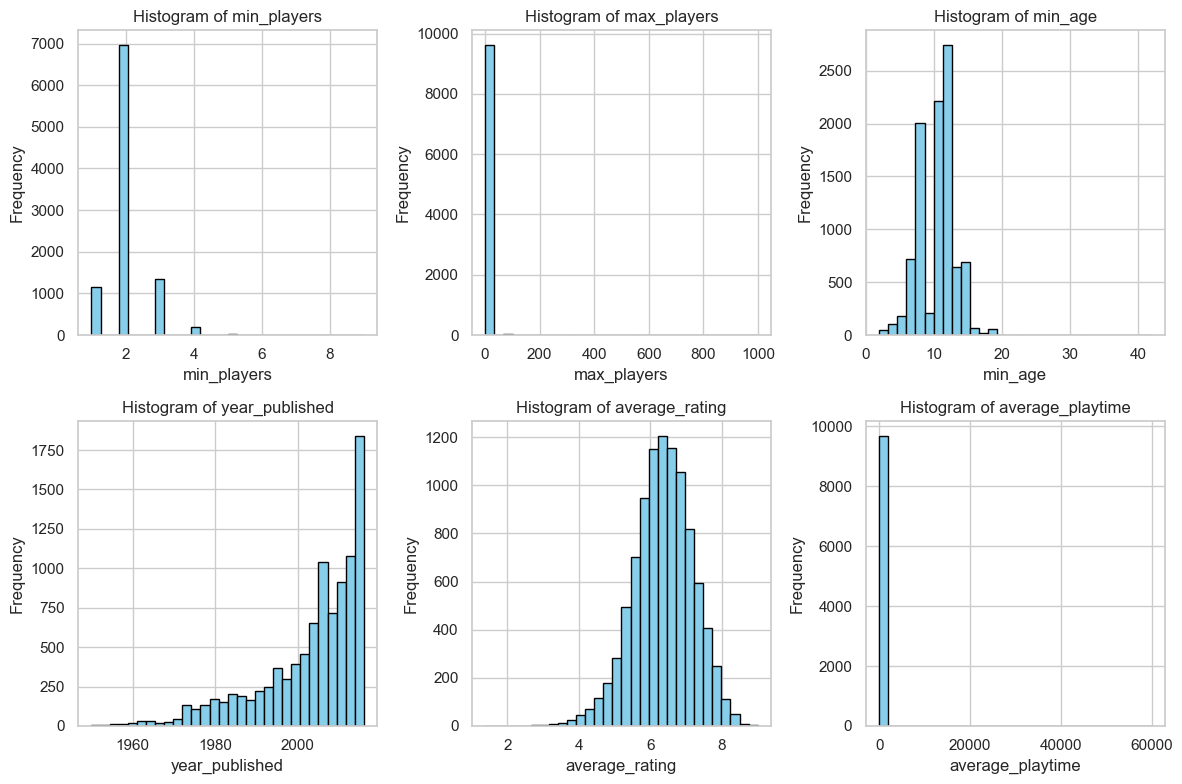

In [31]:
# Vizualizimi sipas tipeve të dhënave
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(dataset[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\hysen\AppData\Local\Temp\ipykernel_18812\1953107218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='users_rated_discretized', data=dataset, palette='viridis')


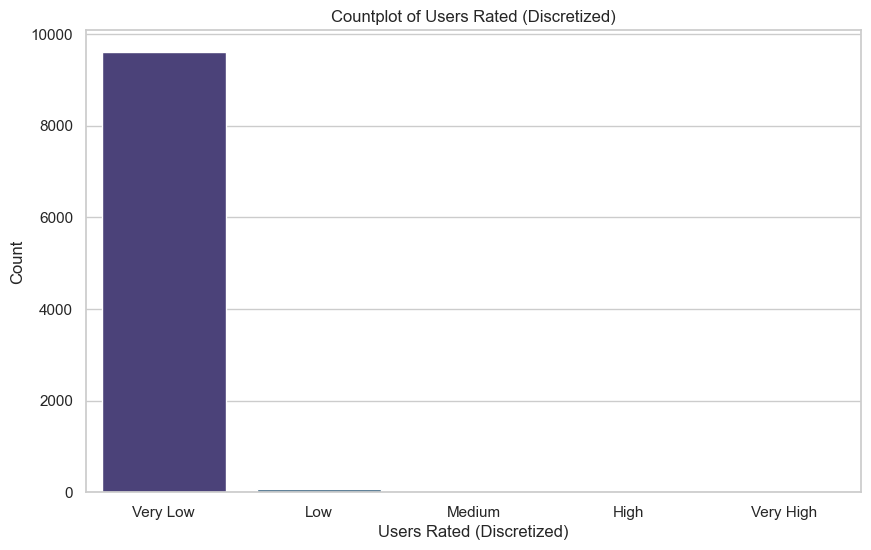

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='users_rated_discretized', data=dataset, palette='viridis')
plt.title('Countplot of Users Rated (Discretized)')
plt.xlabel('Users Rated (Discretized)')
plt.ylabel('Count')
plt.show()

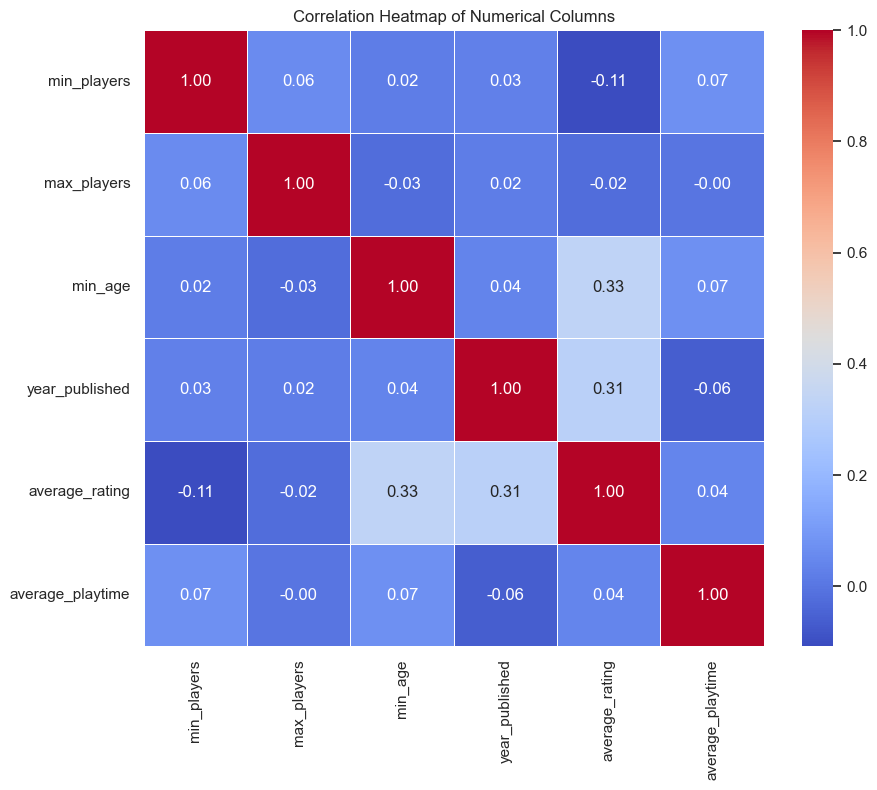

In [33]:
# Vizualizimi statik dhe ineraktiv
plt.figure(figsize=(10, 8))
correlation_matrix = dataset[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [34]:
import plotly.express as px

fig = px.scatter(dataset, x='min_players', y='average_rating', color='min_age', size='average_playtime',
                 hover_name='name', title='Interactive Scatter Plot')
fig.update_layout(showlegend=True)
fig.show()

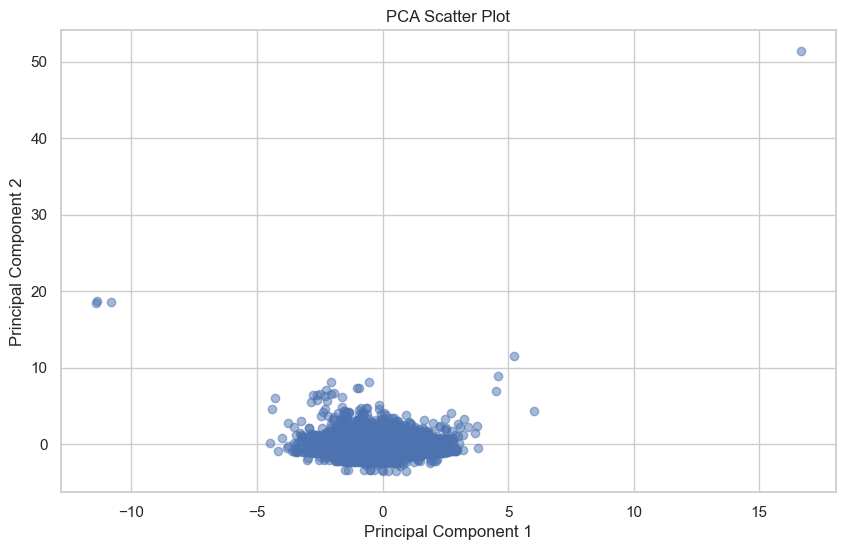

In [35]:
# Vizualizimi i te dhenave shume dimensionale
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardized_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
